# Area Plots, Histograms, and Bar Plots

## Area Plot
Area chart or graph, displays the magnitude and proportion of multiple variables over a continuous axis, typically representing time or another ordered dimension. Similar to line plot but with area below the line filled with color to emphasize the cumulative magnitude of the variables. 

**When to use this?**
Compare two or more quantities

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
data = pd.read_excel("/Users/oktavianu/Data-Science/data-visualization/Canada.xlsx",
                     sheet_name="Canada by Citizenship",
                     skiprows=range(20),
                     skipfooter=2)
data.head() # take a look at our data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [56]:
# dimensions of our data
print(data.shape)

(195, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to Introduction to Matplotlib and Line Plots lab for the rational and detailed description of the changes.

#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [57]:
data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

data.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


The columns Type, Coverage, AREA, REG, and DEV got removed from the dataframe.

#### 2. Rename some of the columns so that they make sense.

In [58]:
data.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [59]:
data_canada = data.copy()
data_canada.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


#### 3. For consistency, ensure that all column labels of type string.

In [60]:
# Examine the types of the column labels
all(isinstance(column, str) for column in data.columns)

False

Notice how the above line of code returned False when we tested if all the column labels are of type string. So let's change them all to string type

In [63]:
data_canada.columns = list(map(str, data_canada.columns))

In [65]:
# check the column labels types
all(isinstance(column, str) for column in data_canada.columns)

True

#### 4. Set the country name as index - useful for quickly looking up countries using .loc method.

In [66]:
data_canada.set_index('Country', inplace=True)

data_canada.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Now the country names now serve as indices.

#### 5. Add 'Total' column

In [71]:
data_canada['Total'] = data_canada.select_dtypes(include='number').sum(axis=1)
data_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980 - 2013. So if we print the dimension of the data, we get:

In [72]:
print("data dimensions:", data_canada.shape)

data dimensions: (195, 38)


In [73]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Visualizing the Data Using Matplotlib

In [74]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.9.2


### Area Plots

In [77]:
data_canada.sort_values(['Total'], ascending=False, axis=0, inplace=True)
data_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


In [78]:
# assign top5 countries to the top5_country variable
top5_countries = data_canada.head()
top5_countries

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


In [79]:
# transpose the dataframe
top5_countries = top5_countries[years].transpose()
top5_countries

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter stacked to value False.

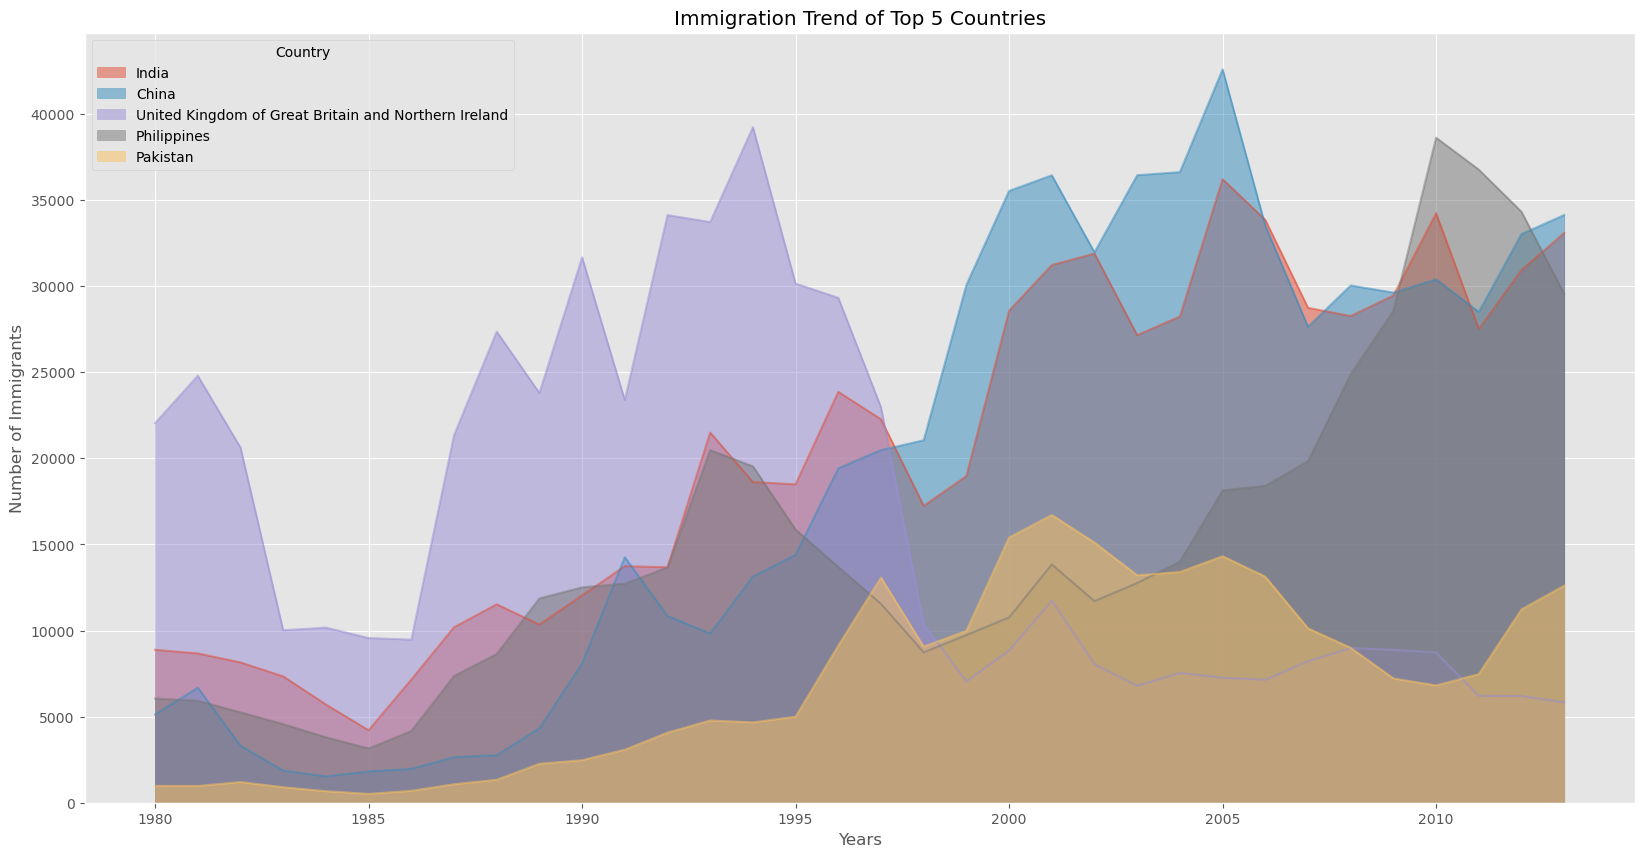

<Figure size 1920x1440 with 0 Axes>

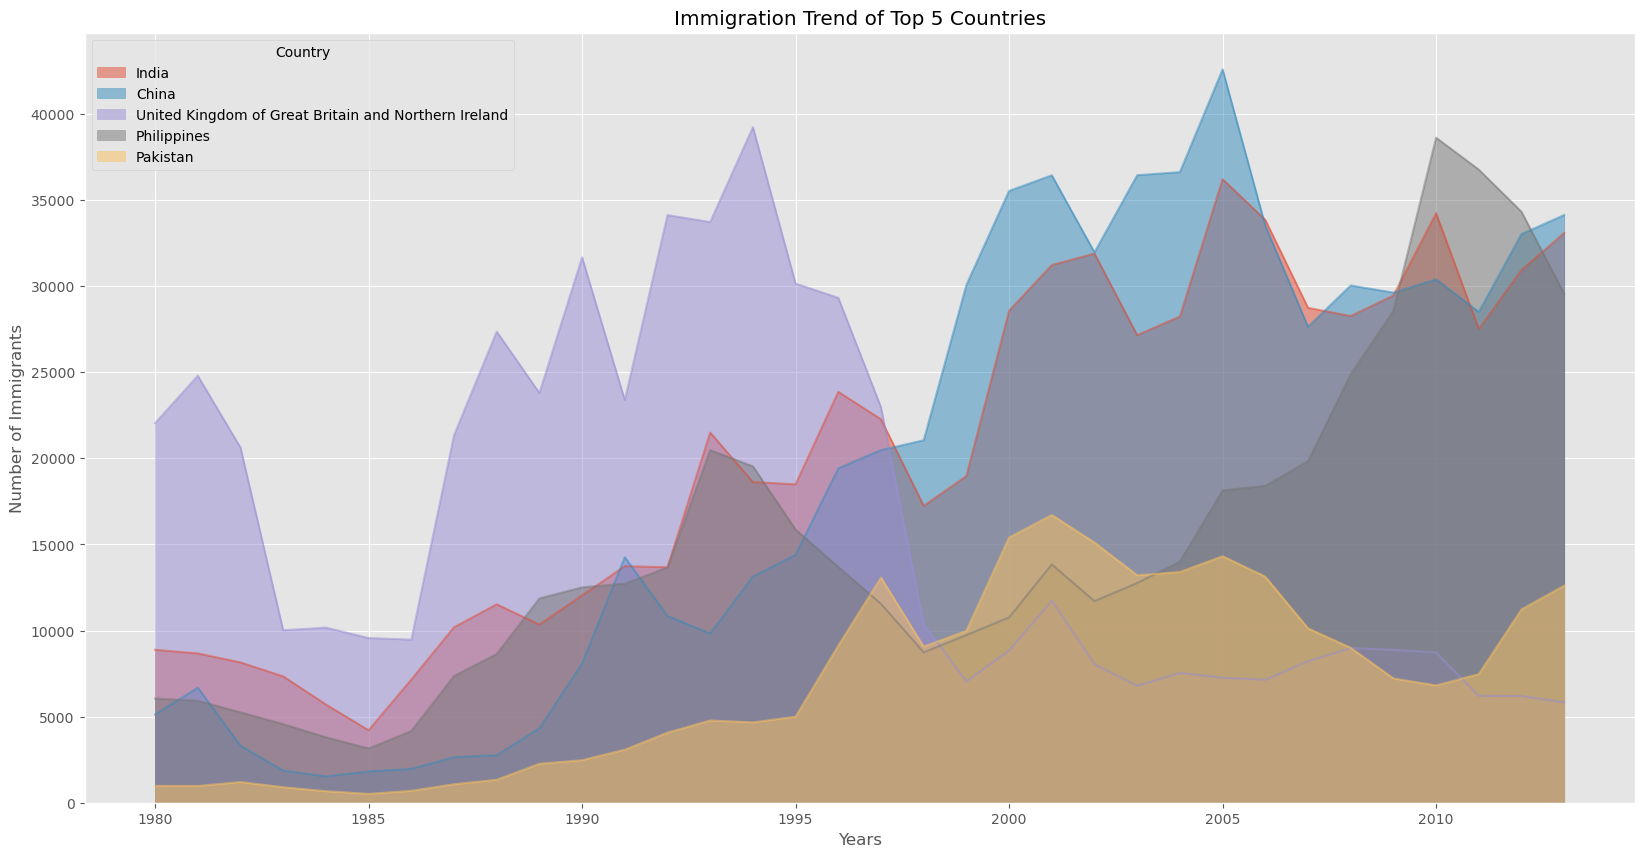

In [82]:
# change the index values of df_top5 to type integer for plotting
top5_countries.index = top5_countries.index.map(int)

# setting high reso
plt.figure(dpi=300)

#plotting
top5_countries.plot(kind='area',
                    stacked=False,
                    figsize=(20, 10))

plt.title("Immigration Trend of Top 5 Countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

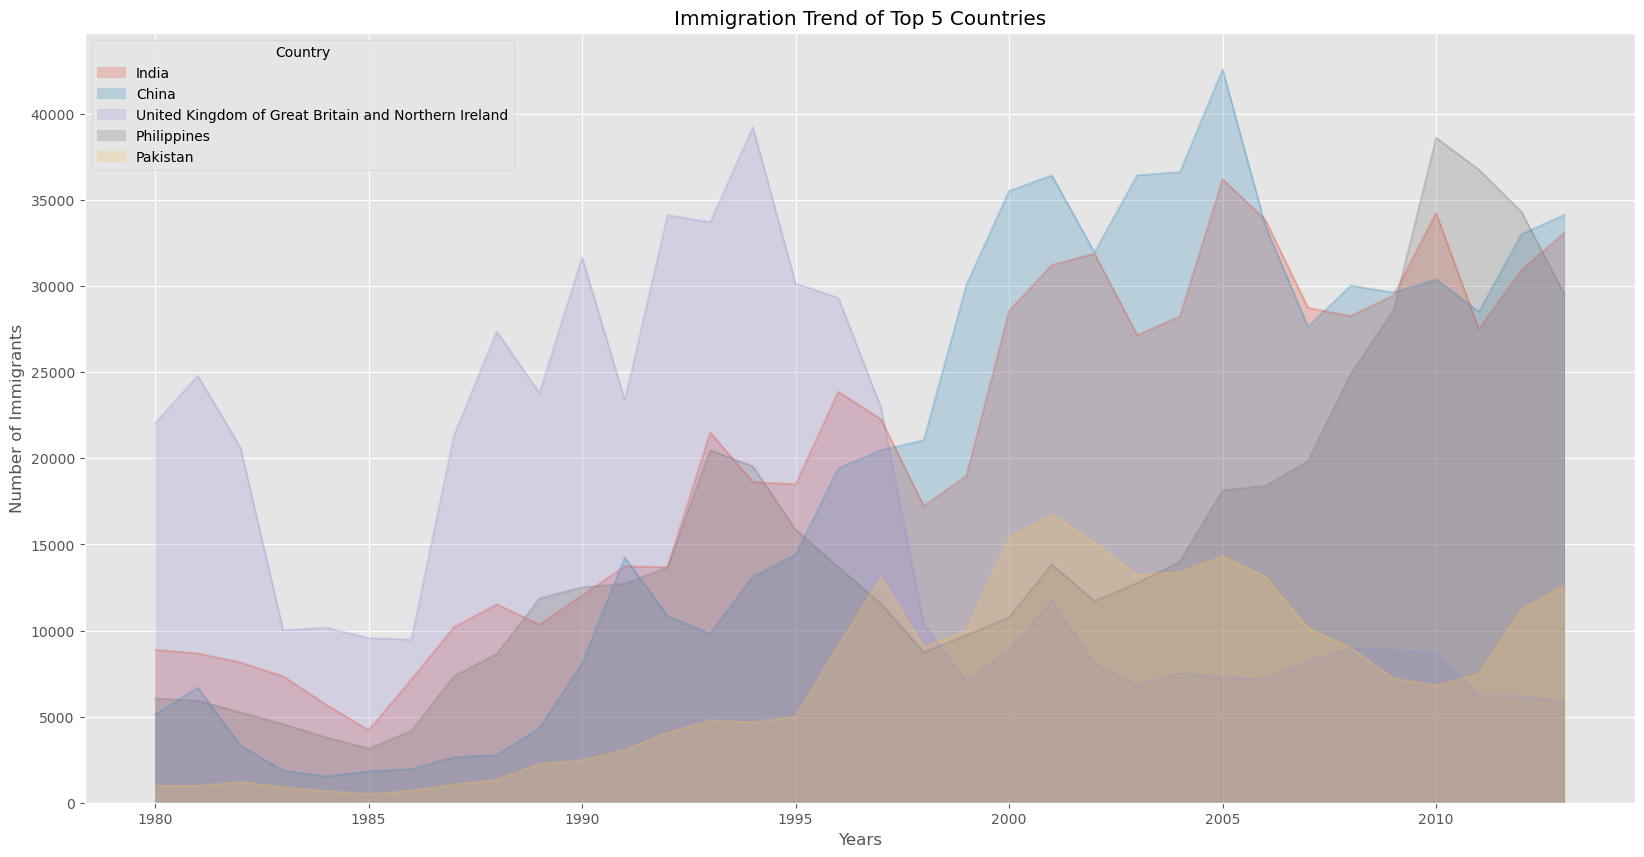

In [83]:
top5_countries.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

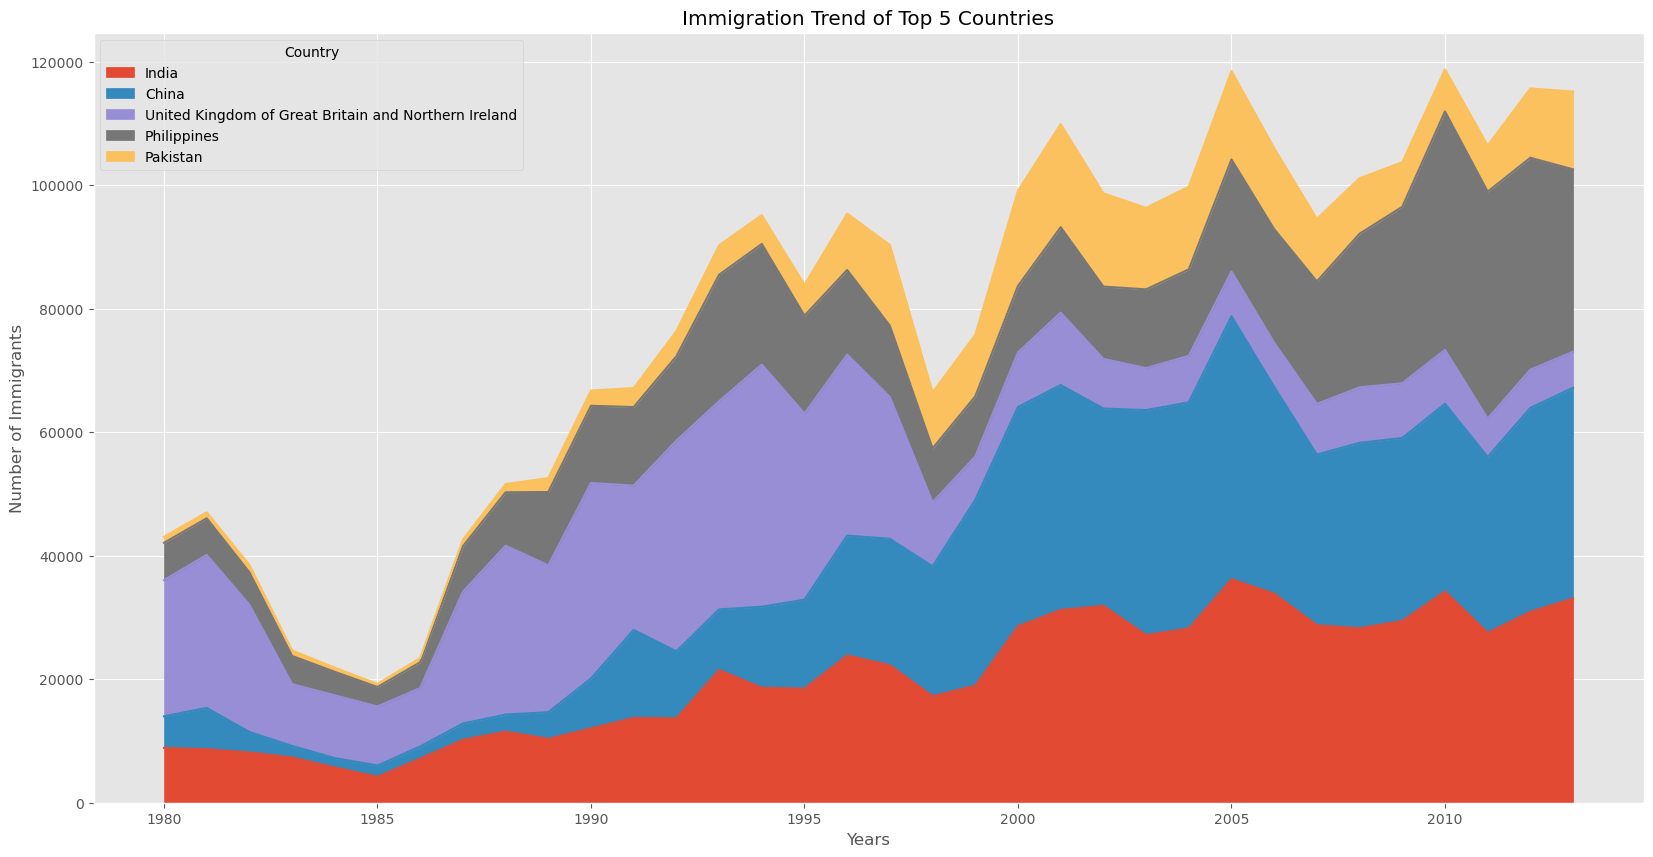

In [84]:
top5_countries.plot(kind='area',   # 0 - 1, default value alpha = 0.5
             stacked=True,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting
There are two styles/options of plotting with matplotlib， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

We can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

**Option 1: This is what we have been using so far**
```python
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
```
**Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)**

We can use an Axes instance of our current plot and store it in a variable (eg. ax). We can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

We will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.


In [88]:
# option 2: preferred option with more flexibility
ax = data_canada.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Text(0.5, 0, 'Years')

### Top 5 Countries with the Least Immigration

In [114]:
least5_immigration = data_canada.tail()
least5_immigration

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,10
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,10
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,4
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [115]:
# top5_least_immigration = top5_least_immigration[years].transpose()
least5_immigration = least5_immigration[years].transpose()

In [116]:
least5_immigration

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0
1985,0,0,0,0,0
1986,1,0,0,0,0
1987,0,0,0,0,0
1988,0,0,0,0,0
1989,0,0,0,0,0


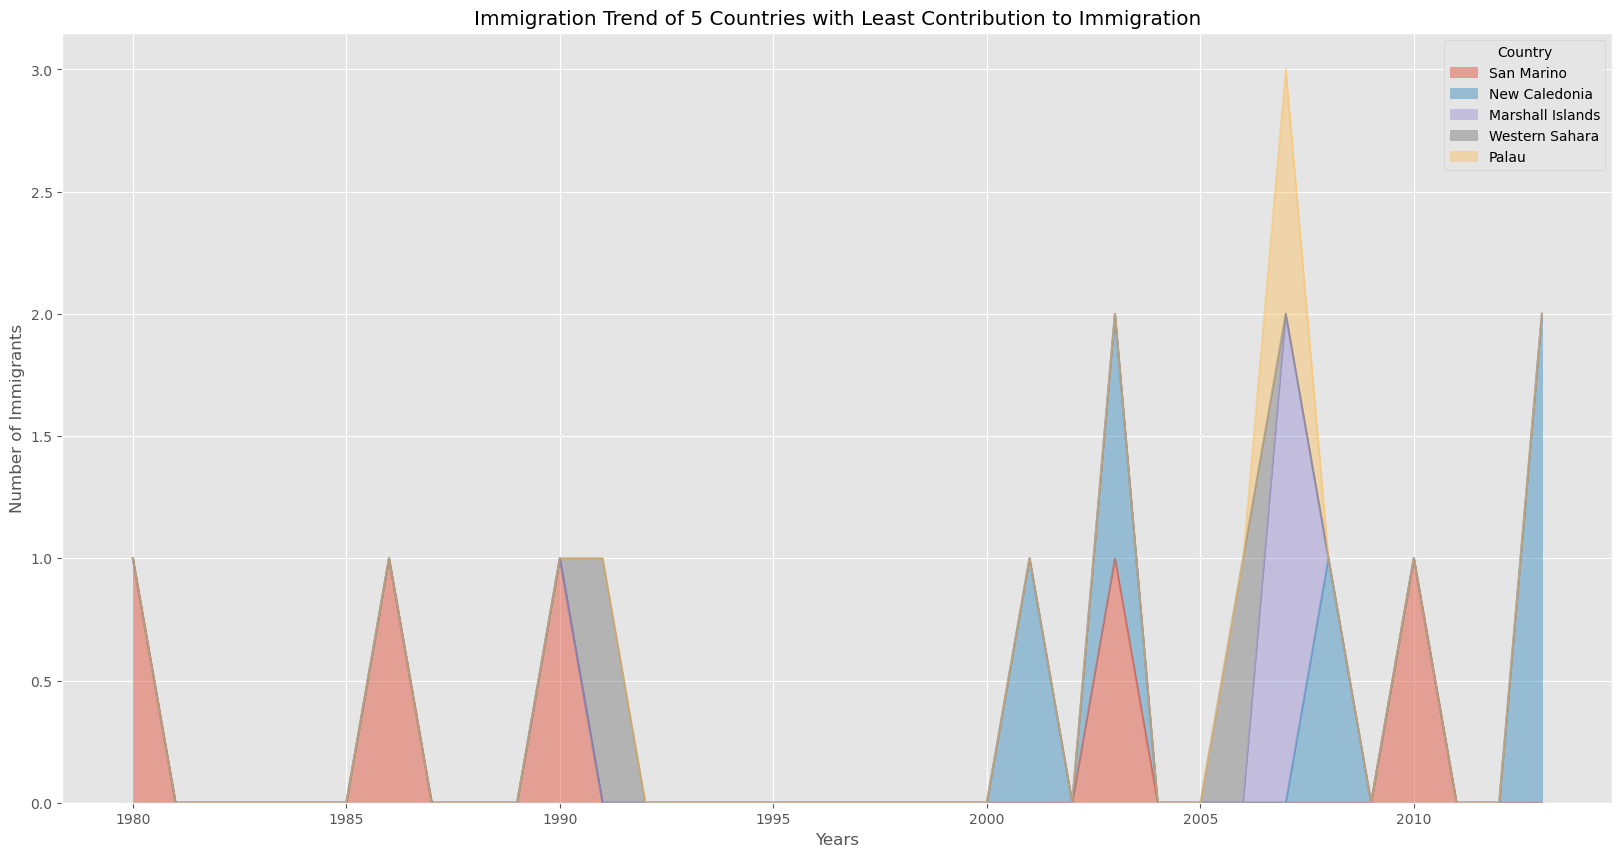

In [118]:
# change the index values of df_top5 to type integer for plotting
least5_immigration.index = least5_immigration.index.map(int)

least5_immigration.plot(kind='area',
                        stacked=True,
                        alpha=0.45,
                        figsize=(20, 10))

plt.title("Immigration Trend of 5 Countries with Least Contribution to Immigration")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.show()

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

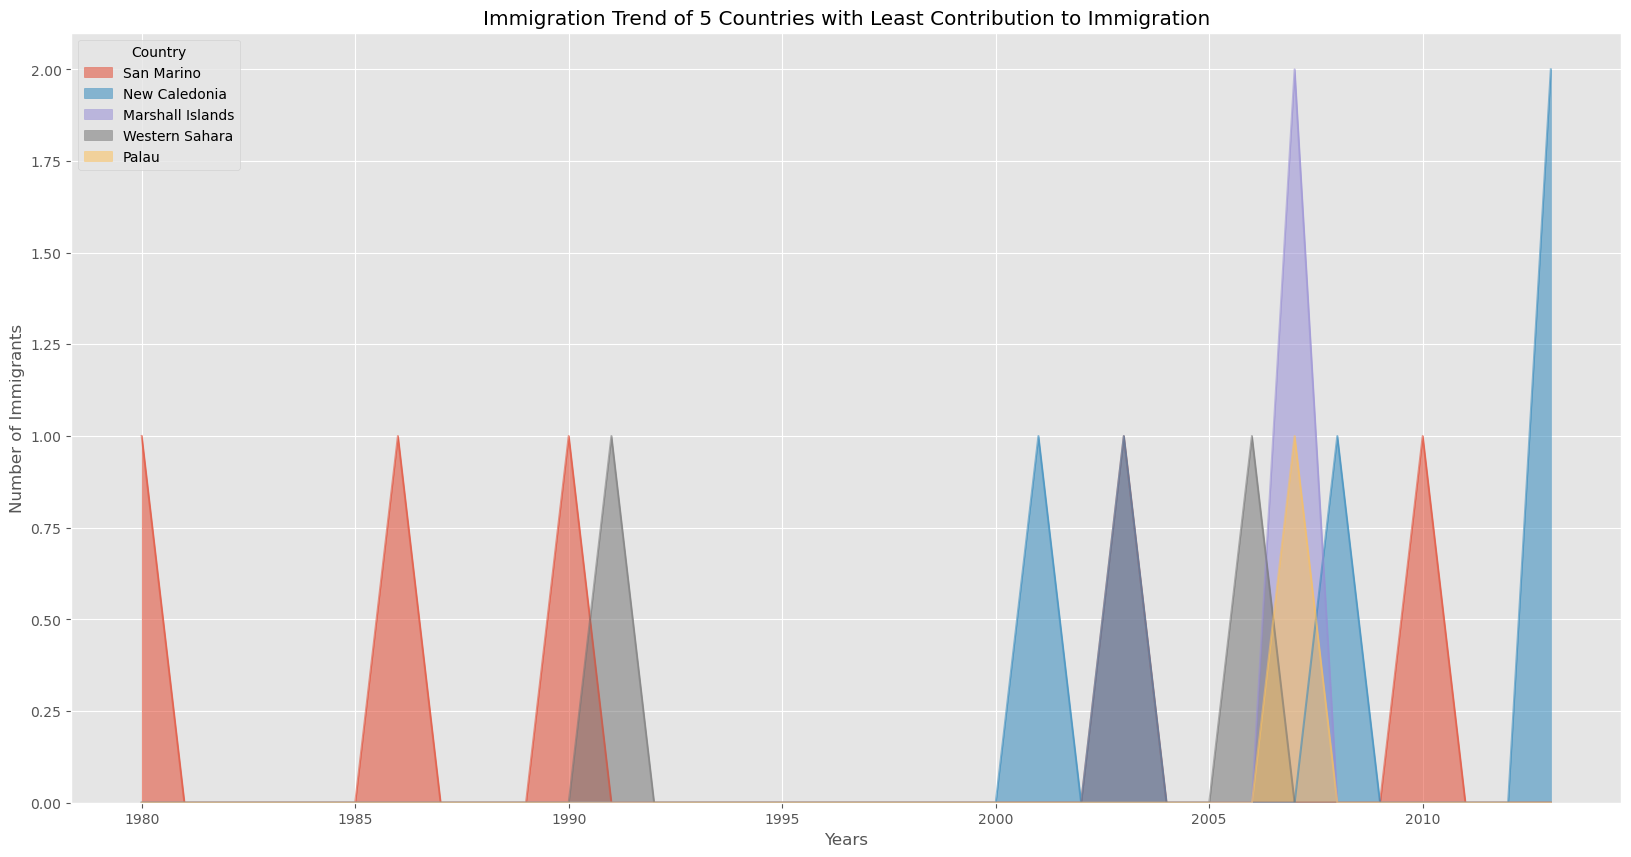

In [119]:
ax = least5_immigration.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title("Immigration Trend of 5 Countries with Least Contribution to Immigration")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

plt.show()

### Histograms

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question**: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [122]:
# let's quickly view the 2013 data
data_canada['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [124]:
import numpy as np
# np.histogram returns 2 values
cont, bin_edges = np.histogram(data_canada['2013'])

print(cont) # freq count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


We can easily graph this distribution by passing `kind=hist` to `plot()`.

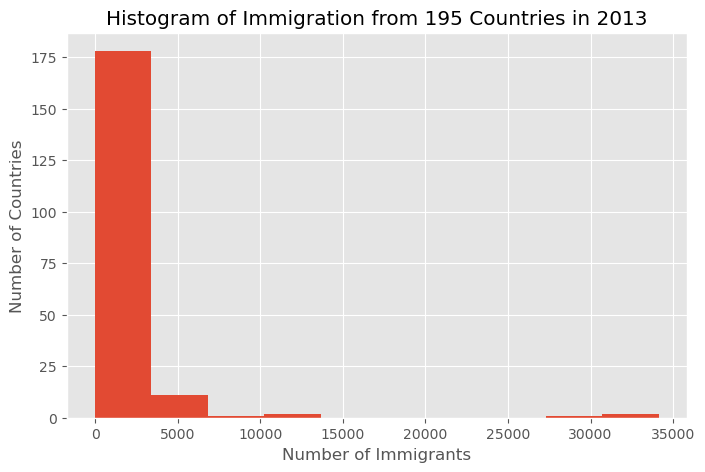

In [125]:
data_canada['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to hist
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

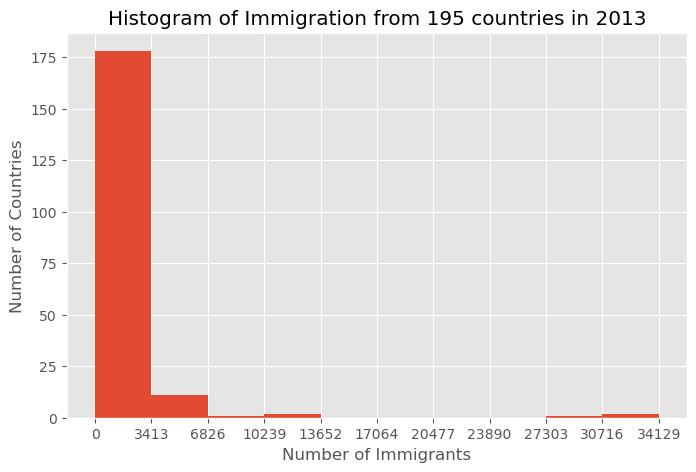

In [126]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data_canada['2013'])

data_canada['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

**Side Note**: We could use `data_canada['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

See the pandas documentation for more info http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html.

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [128]:
# view the dataset 
data_canada.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [129]:
# generate hist
data_canada[['Denmark', 'Norway', 'Sweden'], years].plot().hist()

InvalidIndexError: (['Denmark', 'Norway', 'Sweden'], ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'])

That does not look right!

Don't worry, you'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.


In [131]:
data_dns_t = data_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
data_dns_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


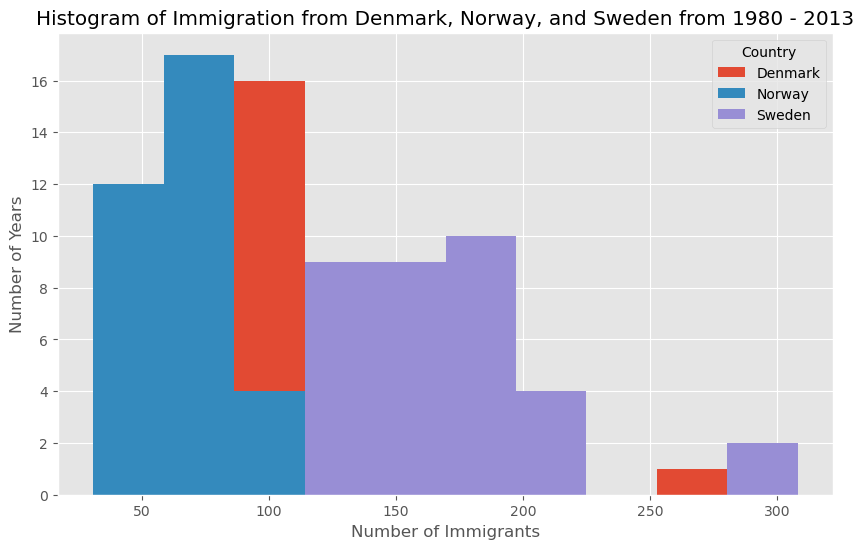

In [132]:
# generate histogram
data_dns_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Make a few modifications to improve the impact and aesthetics of the previous plot:

- increase the bin size to 15 by passing in bins parameter;
- set transparency to 60% by passing in alpha parameter;
- label the x-axis by passing in x-label parameter;
- change the colors of the plots by passing in color parameter.


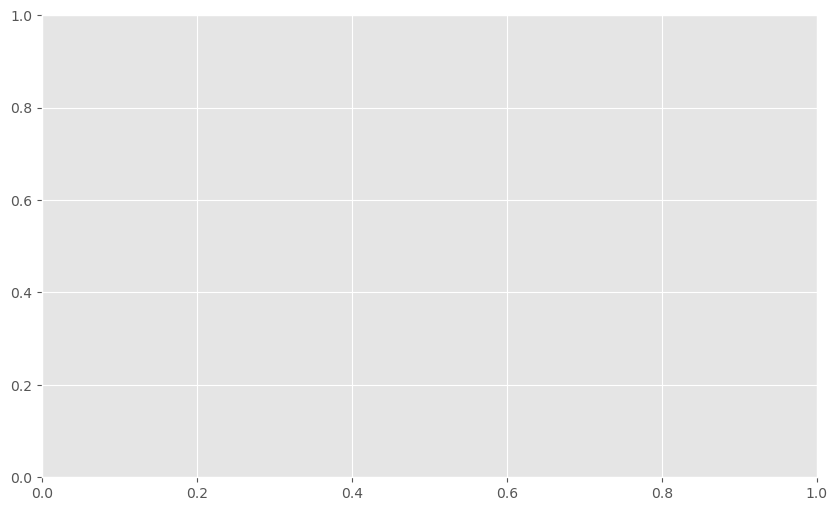

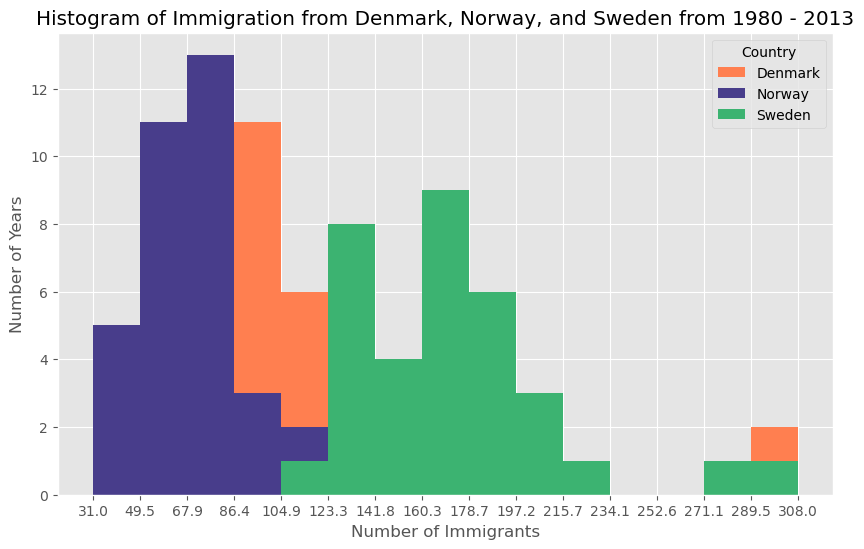

In [134]:
# get the x-tick values
count, bin_edges = np.histogram(data_dns_t, 15)

# unstacked hist
data_dns_t.plot(kind='hist',
                figsize=(10, 6),
                bins=15,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip: For a full listing of colors available in Matplotlib, run the following code in your python shell:
```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

If we do not want the plots to overlap each other, we can stack them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

In [139]:
count, bin_edges = np.histogram(data_dns_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  

# stacked Histogram
data_dns_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

# plt.show()

Text(0.5, 0, 'Number of Immigrants')

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

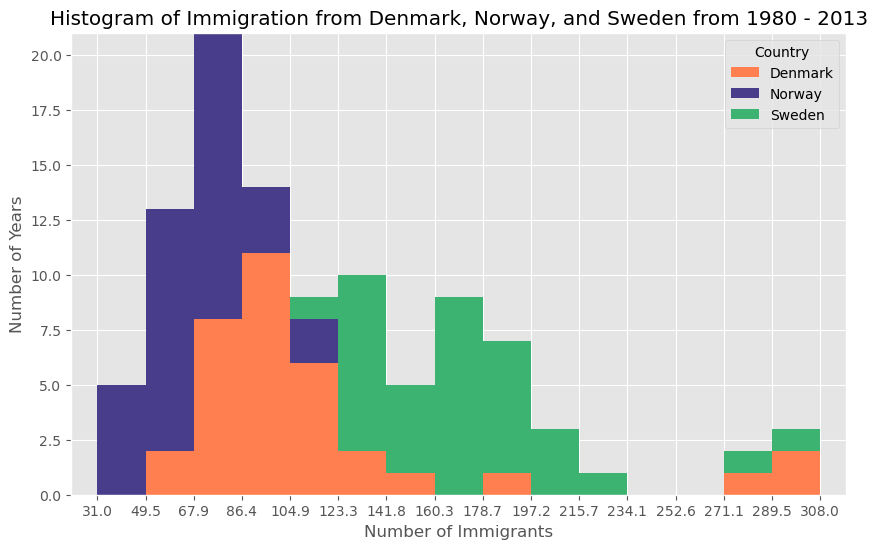

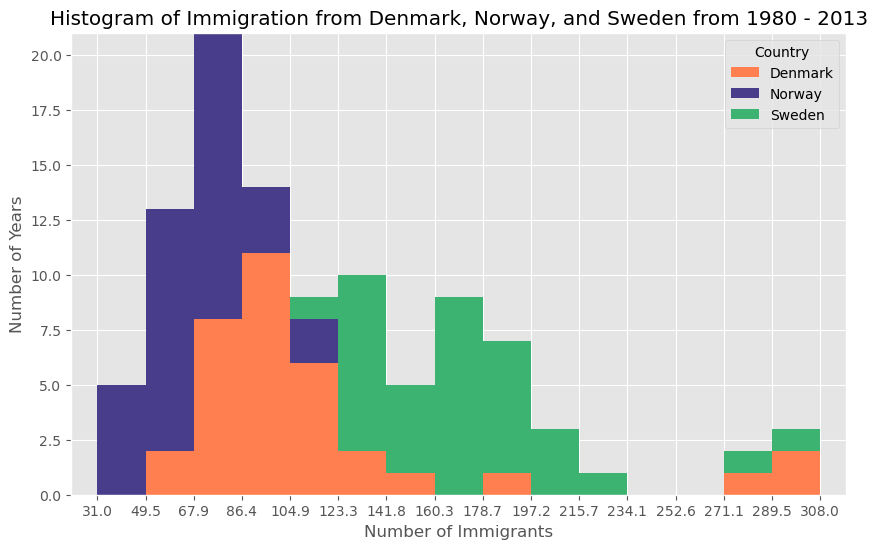

In [140]:
ax = data_dns_t.plot(kind='hist',
                     figsize=(10, 6),
                     bins=15,
                     xticks=bin_edges,
                     color=['coral', 'darkslateblue', 'mediumseagreen'],
                     stacked=True,
                     xlim=(xmin, xmax))

ax.set_title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Years")

plt.show()

### Bar Charts (DataFrame)

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

- kind=bar creates a vertical bar plot
- kind=barh creates a horizontal bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question**: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [141]:
# step 1, get the data
data_iceland = data_canada.loc['Iceland', years]
data_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

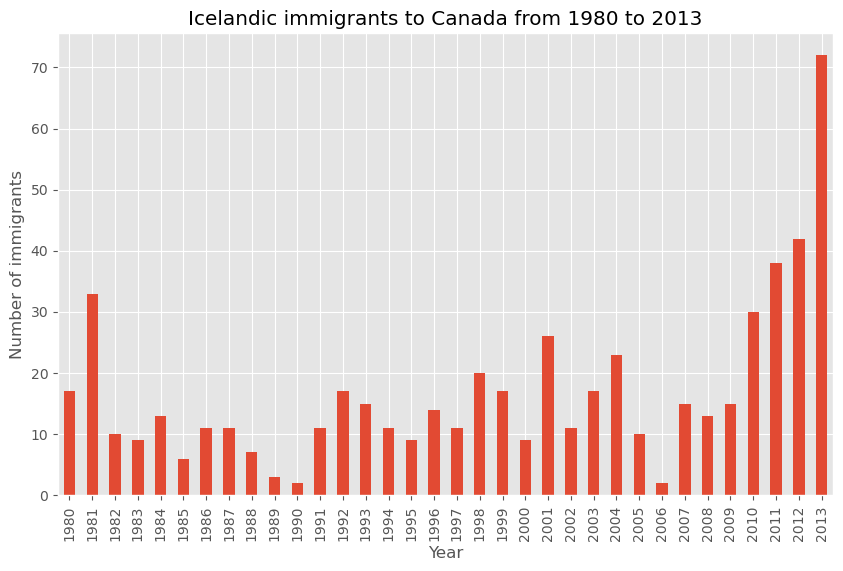

In [142]:
# step 2, plot the data
data_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

- s: str, the text of annotation.
- xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- arrowprops: Takes a dictionary of properties to draw the arrow:
  -   arrowstyle: Specifies the arrow style, '->' is standard arrow.
  -   connectionstyle: Specifies the connection type. arc3 is a straight line.
  -   color: Specifies color of arrow.
  -   lw: Specifies the line width.

Matplotlib documentation for more details on annotations: http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate.   




In [148]:
data_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# annotate arrow
plt.annotate('', # s: str. Will leave it blank for no text
             xy=(32, 70), # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20), # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data', # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
)

# plt.show()

Text(28, 20, '')

Also annotate a text to go over the arrow. We will pass in the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

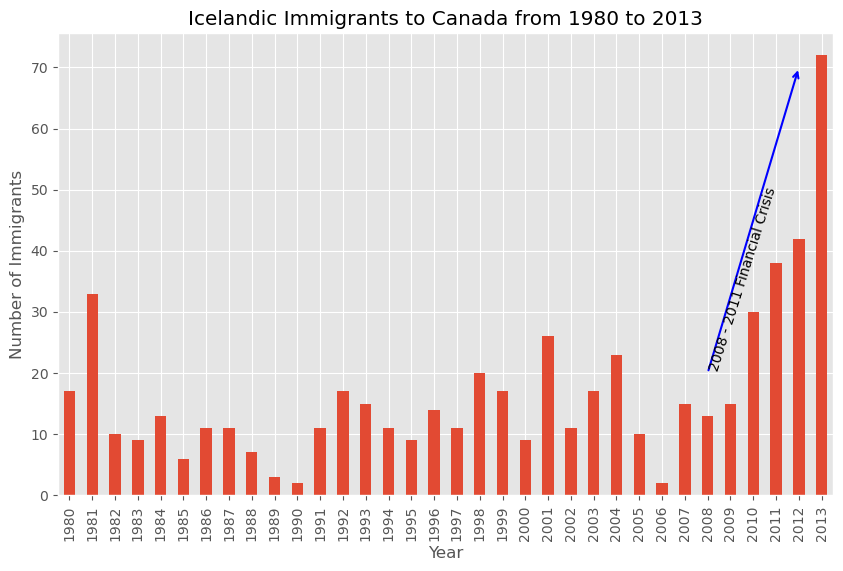

In [152]:
data_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),
             xytext=(28, 20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=1.5)
             )

# Annotate text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 20), # start the text at at point (year 2008 , pop 30)
             rotation=72.5, # based on trial and error to match the arrow
             va='bottom', # want the text to be vertically 'bottom' aligned
             ha='left', # want the text to be horizontally 'left' algned.
             )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categorical variables.

**Question**: Using the scripting layer and the data_canada dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


**Step 1: Get the data pertaining to the top 15 countries.**

In [157]:
# Add total column
data['Total'] = data.select_dtypes(include='number').sum(axis=1)
data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [165]:
data.sort_values(['Total'], ascending=False, inplace=True)

data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [166]:
# top 15 countries
top15_countries = data.head(15)
top15_countries

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
185,United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
81,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
162,Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
140,Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
137,Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,...,1405,1263,1235,1267,1013,795,720,779,852,139241


**Step 2: PLot data**
1.  Use `kind='barh'` to generate a bar chart with horizontal bars.
2.  Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3.  Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

In [170]:
# generate plot
top15_countries.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(top15_countries): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

ValueError: invalid literal for int() with base 10: 'Country'